In [5]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import os
import pandas as pd
import rendering
from tqdm import tqdm
import trimesh

In [56]:
rendering.set_font(size=18)

In [3]:
folder = 'E:/stlmodels/'
extension = '.bin'

files = os.scandir(folder)
files = [f for f in files if f.name.endswith(extension)]

In [45]:
# Read stats from every mesh
num_vertices = []
num_faces = []

if len(files) == 0:
    extension = '.stl'
    files = os.scandir(folder)
    files = [f for f in files if f.name.endswith(extension)]
       
    for f in tqdm(files):
        mesh = trimesh.load(f.path)
        num_vertices.append(mesh.vertices.shape[0])
        num_faces.append(mesh.faces.shape[0])
else:
    for f in tqdm(files):
        # Open binary file
        file = open(f.path, 'rb')
        num_comps = int.from_bytes(file.read(8), byteorder='little')
        num_v = int.from_bytes(file.read(8), byteorder='little')
        file.read(16 * 4 * num_v)
        num_f = int.from_bytes(file.read(8), byteorder='little')
    
        num_vertices.append(num_v)
        num_faces.append(num_f)

100%|██████████| 1052/1052 [07:35<00:00,  2.31it/s]


C:\Users\AlfonsoLópezRuiz\AppData\Local\Temp\ipykernel_6584\2252404309.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


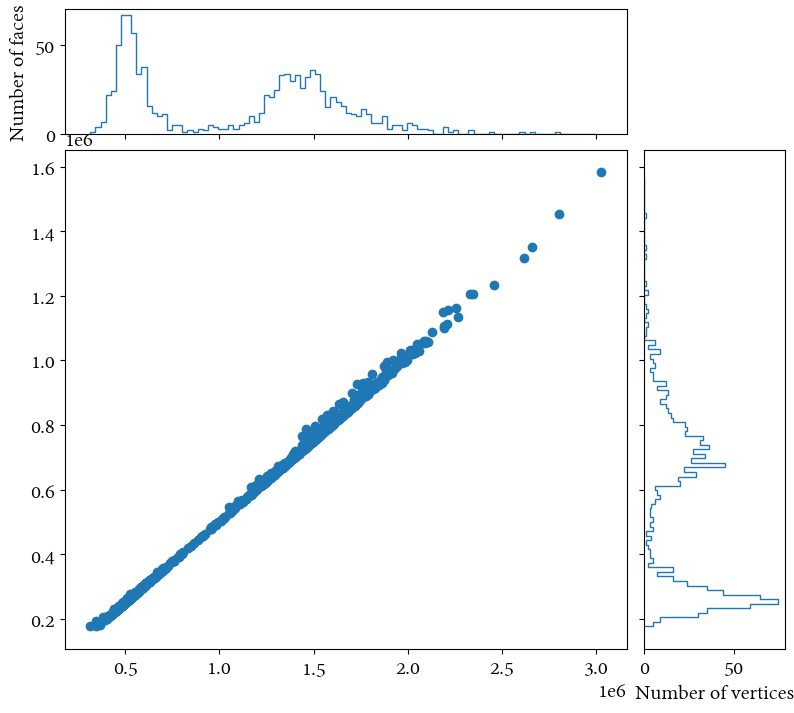

In [46]:
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

    # now determine nice limits by hand:
    x_max, x_min = np.max(x), np.min(x)
    x_bins = np.arange(x_min, x_max, (x_max - x_min) / 100)
    ax_histx.hist(x, histtype='step', bins=x_bins)
    
    y_max, y_min = np.max(y), np.min(y)
    y_bins = np.arange(y_min, y_max, (y_max - y_min) / 100)
    ax_histy.hist(y, orientation='horizontal', histtype='step', bins=y_bins)


fig = plt.figure(figsize=(9, 8))
# gridspec
gs = fig.add_gridspec(2, 2, width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# axes
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
# Draw the scatter plot and marginals
scatter_hist(num_vertices, num_faces, ax, ax_histx, ax_histy)
# axes labels
ax_histx.set_ylabel('Number of faces')
ax_histy.set_xlabel('Number of vertices')
# save back into disk
plt.tight_layout()
plt.savefig('results/num_vertices_faces.png', dpi=500)
plt.show()

In [47]:
csv_file = 'assets/class_ana.csv'

# read csv to link names and class
df = pd.read_csv(csv_file, sep=',', names=['Id', 'Name', 'Class'], header=0)
# Third column to int
df['Class'] = df['Class'].astype(int)
# Create a dictionary with first column as key and second column as value
class_dict = dict(zip(df['Name'], df['Class']))
num_classes = np.amax(list(class_dict.values()))

In [48]:
class_info = [[] for key in range(num_classes)]

for file_idx, file in enumerate(files):
    # get name of file
    name = file.name.split('.')[0]
    if name in class_dict:
        class_id = class_dict[name] - 1
        class_info[class_id].append((num_vertices[file_idx], num_faces[file_idx]))

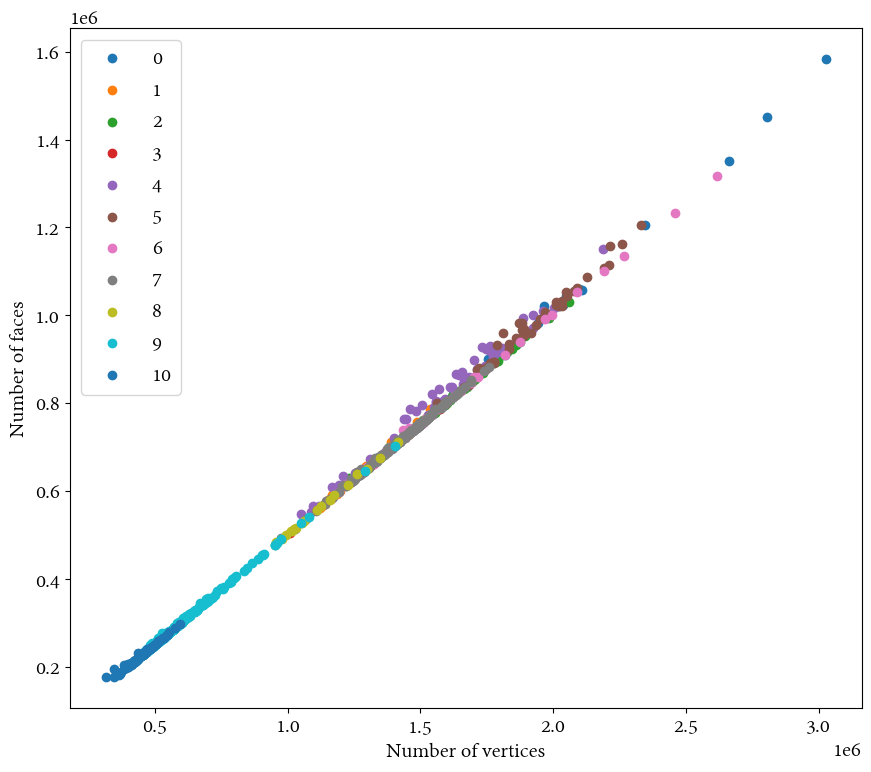

In [51]:
# Display number of vertices and faces per class with different colors
fig, ax = plt.subplots(figsize=(9, 8))
for class_id, info in enumerate(class_info):
    if len(info) == 0:
        continue
    num_vertices, num_faces = zip(*info)
    ax.scatter(num_vertices, num_faces, label=class_id)
ax.set_xlabel('Number of vertices')
ax.set_ylabel('Number of faces')
ax.legend()
plt.tight_layout()
plt.savefig('results/num_vertices_faces_class.png', dpi=500)
plt.show()

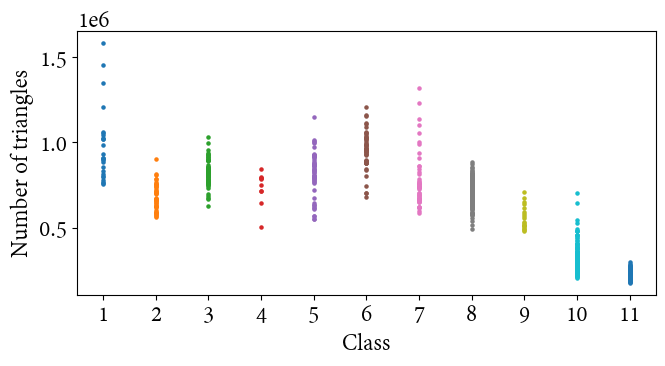

In [58]:
# Show number of faces with class being the x axis
fig, ax = plt.subplots(figsize=(7, 4))
for class_id, info in enumerate(class_info):
    if len(info) == 0:
        continue
    num_vertices, num_faces = zip(*info)
    ax.scatter([class_id + 1] * len(num_faces), num_faces, label=class_id, s=5)
ax.set_xlabel('Class')
ax.set_ylabel('Number of triangles')
plt.xticks(np.arange(1, len(class_info) + 1, 1))
plt.tight_layout()
plt.savefig('results/num_faces_class.png', dpi=500)
plt.show()

In [35]:
len(class_dict.keys())

1018